In [1]:
from PIL import Image

# Load the image
image_path = "InsulatorDataSet/Normal_Insulators/images/0049.jpg"
image = Image.open(image_path)


# Get the size (width and height) of the image
width, height = image.size

# Print the size
print("Image width:", width)
print("Image height:", height)


Image width: 1152
Image height: 864


In [4]:
import torch

if torch.cuda.is_available():
    print("CUDA is available")
else:
    print("CUDA is not available")

device_index = 0  # Select the first GPU
torch.cuda.set_device(device_index)

CUDA is not available


AttributeError: module 'torch._C' has no attribute '_cuda_setDevice'

In [2]:
import torch
from torchvision import transforms
from PIL import Image
import xml.etree.ElementTree as ET
import os

# Define the preprocessing transformations
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Preprocess a single image and its corresponding target annotations
def preprocess_data(image_file, xml_file, label_map):
    # Load the image
    image = Image.open(image_file)

    # Resize the image
    image = image.resize((1152, 864))

    # Convert the image to tensor and apply normalization
    image = preprocess(image)

    # Parse XML and get image and annotation information
    image_path, image_width, image_height, boxes, labels = parse_xml(xml_file)

    # Convert the bounding box coordinates to the format [xmin, ymin, xmax, ymax]
    boxes = [[box[0], box[1], box[0] + box[2], box[1] + box[3]] for box in boxes]

    # Convert the lists to tensors
    boxes = torch.FloatTensor(boxes)
    labels = [label_map[label] for label in labels]  # Map string labels to integer labels
    labels = torch.LongTensor(labels)

    return image, boxes, labels

# XML parsing function
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    image_path = root.find('path').text
    image_width = int(root.find('size/width').text)
    image_height = int(root.find('size/height').text)

    boxes = []
    labels = []

    for obj in root.findall('object'):
        label = obj.find('name').text
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)
        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(label)

    return image_path, image_width, image_height, boxes, labels

# Set the paths to the folders containing the images and XML files
image_folder = "InsulatorDataSet/Normal_Insulators/images"
xml_folder = "InsulatorDataSet/Normal_Insulators/labels"

# Define the label mapping (string labels to integer labels)
label_map = {"insulator": 0, "label1": 1, "label2": 2, "label3": 3}

# Get the list of image files and XML files
image_files = os.listdir(image_folder)
xml_files = os.listdir(xml_folder)

# Process each image and its corresponding XML file
for xml_file in xml_files:
    # Get the corresponding image file name
    image_file = os.path.splitext(xml_file)[0] + ".jpg"
    image_path = os.path.join(image_folder, image_file)
    xml_path = os.path.join(xml_folder, xml_file)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [ ]:
# import random
# from torchvision import transforms

# def preprocess_data(image_file, xml_file, label_map):
#     # Load the image
#     image = Image.open(image_file)

#     # Resize the image while preserving aspect ratio
#     target_size = 1152
#     aspect_ratio = image.width / image.height
#     if aspect_ratio > 1:
#         new_size = (target_size, int(target_size / aspect_ratio))
#     else:
#         new_size = (int(target_size * aspect_ratio), target_size)
#     image = image.resize(new_size)

#     # Data augmentation
#     transform = transforms.Compose([
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomCrop(new_size, pad_if_needed=True),
#         transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
#     ])
#     image = transform(image)

#     # Convert the image to tensor and apply normalization
#     preprocess = transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#     ])
#     image = preprocess(image)

#     # Parse XML and get image and annotation information
#     image_path, image_width, image_height, boxes, labels = parse_xml(xml_file)

#     # Convert the bounding box coordinates to the format [xmin, ymin, xmax, ymax]
#     boxes = [[box[0], box[1], box[0] + box[2], box[1] + box[3]] for box in boxes]

#     # Convert the lists to tensors
#     boxes = torch.FloatTensor(boxes)
#     labels = [label_map[label] for label in labels]  # Map string labels to integer labels
#     labels = torch.LongTensor(labels)

#     return image, boxes, labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


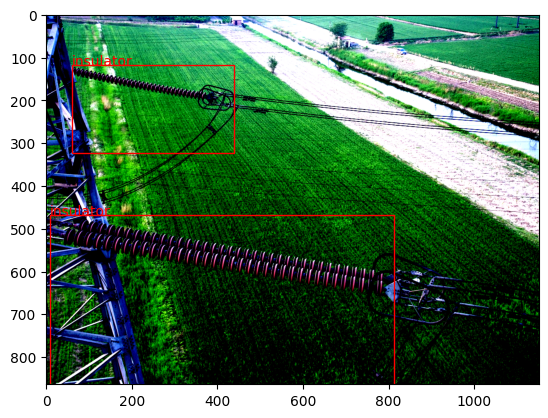

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Preprocess the image and get bounding box information
image_path = "InsulatorDataSet//Normal_Insulators/images/0097.jpg"
xml_file = "InsulatorDataSet//Normal_Insulators/labels/0097.xml"
image, boxes, labels = preprocess_data(image_path, xml_file, label_map)

# Display the image with bounding boxes
def show_image_with_boxes(image, boxes, labels, label_map):
    # Create a figure and axis
    fig, ax = plt.subplots(1)
    ax.imshow(image.permute(1, 2, 0))  # Convert tensor to the format (H, W, C)

    # Loop through each bounding box and label
    for box, label_id in zip(boxes, labels):
        label = list(label_map.keys())[list(label_map.values()).index(label_id)]

        # Extract coordinates
        xmin, ymin, xmax, ymax = box

        # Create a rectangle patch
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')

        # Add the rectangle patch to the axis
        ax.add_patch(rect)

        # Add label text near the bounding box
        ax.text(xmin, ymin, f"{label}", color='r')

    # Show the image with bounding boxes
    plt.show()

# Call the function to display the image with bounding boxes
show_image_with_boxes(image, boxes, labels, label_map)


In [4]:
import torchvision
from torch.utils.data import DataLoader

# Define the dataset class
class InsulatorDataset(torch.utils.data.Dataset):
    def __init__(self, image_folder, xml_folder, label_map, preprocess):
        self.image_folder = image_folder
        self.xml_folder = xml_folder
        self.label_map = label_map
        self.preprocess = preprocess

        self.image_files = os.listdir(image_folder)
        self.xml_files = os.listdir(xml_folder)

    def __getitem__(self, index):
        xml_file = self.xml_files[index]
        image_file = os.path.splitext(xml_file)[0] + ".jpg"
        image_path = os.path.join(self.image_folder, image_file)
        xml_path = os.path.join(self.xml_folder, xml_file)

        image_tensor, target_boxes, target_labels = preprocess_data(image_path, xml_path, self.label_map)

        # Wrap target boxes and labels into a dictionary
        target = {}
        target["boxes"] = target_boxes
        target["labels"] = target_labels

        return image_tensor, target

    def __len__(self):
        return len(self.xml_files)

# Create the dataset
dataset = InsulatorDataset(image_folder, xml_folder, label_map, preprocess)

# Set the training parameters
batch_size = 42
num_epochs = 10
learning_rate = 0.001

def collate_fn(batch):
    images, targets = zip(*batch)
    return images, targets




In [5]:
import torch
from torch.utils.data import random_split

# Split the dataset into training and testing subsets
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # Remaining 20% for testing
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders for training and testing
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=collate_fn)
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=collate_fn)

# Instantiate the Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Replace the number of output classes in the model's classifier with the number of insulator classes
num_classes = len(label_map)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Define the optimizer and the learning rate scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
for images, targets in train_data_loader:
    # Print the first image and its targets
    print("Sample Image Tensor:")
    print(images[0])  # Print the first image in the batch

    print("Sample Targets (Annotations):")
    print(targets[0])  # Print the annotations (targets) for the first image in the batch
    break  # Break after printing the first batch for demonstration purposes

Sample Image Tensor:
tensor([[[ 0.6049,  0.6563,  0.6392,  ...,  0.8104,  0.9132,  0.8618],
         [ 0.6392,  0.6563,  0.6392,  ...,  0.7762,  0.8447,  0.8789],
         [ 0.6392,  0.6221,  0.6049,  ...,  0.2453,  0.5878,  0.7077],
         ...,
         [-0.7479, -0.7479, -0.7822,  ...,  0.0398,  0.0398,  0.0056],
         [-0.6794, -0.7137, -0.8335,  ...,  0.0741, -0.0629,  0.0569],
         [-0.6794, -0.9363, -0.8678,  ...,  0.1768, -0.0801, -0.0287]],

        [[ 0.5203,  0.5728,  0.5553,  ...,  1.0280,  1.0980,  1.0455],
         [ 0.4853,  0.5028,  0.5203,  ...,  0.8354,  0.9755,  1.0105],
         [ 0.4503,  0.4328,  0.4503,  ...,  0.4153,  0.8529,  1.0105],
         ...,
         [-0.6702, -0.7227, -0.7577,  ..., -0.0224, -0.0749, -0.1099],
         [-0.6001, -0.6877, -0.8102,  ...,  0.0126, -0.1275, -0.0049],
         [-0.6001, -0.8627, -0.8452,  ...,  0.1176, -0.1099, -0.0574]],

        [[ 0.5834,  0.6356,  0.6182,  ...,  1.2282,  1.2980,  1.2457],
         [ 0.5834,  0.60

In [5]:
# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Running on device: {device}")
# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for images, targets in train_data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Forward pass
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        total_loss += losses.item()

        # Backward pass
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    # Update the learning rate
    lr_scheduler.step()

    # Print the epoch loss
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_data_loader)}")


NameError: name 'model' is not defined

In [ ]:
# Save the trained model
torch.save(model.state_dict(), "insulator_detection_model.pth")

In [ ]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import torch

# Create a COCO-style annotations dictionary
coco_gt_dict = {
    "info": {},  # Provide information about the dataset
    "licenses": [],  # Provide licenses (if any)
    "images": [],  # Provide image information (id, file_name, height, width, etc.)
    "annotations": [],  # Provide annotations (id, image_id, category_id, bbox, etc.)
    "categories": [],  # Provide category information (id, name, etc.)
}

# Assuming you have the COCO-style ground truth annotations in coco_gt_dict
# and the predictions from the model
coco_pred_dict = {
    "images": [],  # Provide image information (id, file_name, height, width, etc.)
    "annotations": [],  # Provide annotations (id, image_id, category_id, bbox, score, etc.)
    "categories": [],  # Provide category information (id, name, etc.)
}

# Load COCO API instances
coco_gt = COCO()
coco_pred = COCO()

# Load COCO-style annotations into COCO API instances
coco_gt.dataset = coco_gt_dict
coco_gt.createIndex()

coco_pred.dataset = coco_pred_dict
coco_pred.createIndex()

# Run evaluation
with torch.no_grad():
    for images, targets in test_data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Forward pass to get predictions
        predictions = model(images)

        # Convert predictions and targets to COCO format and add them to coco_pred_dict
        # You need to implement this conversion based on the expected format of coco_pred_dict

# Compute evaluation metrics
coco_eval = COCOeval(coco_gt, coco_pred, iouType='bbox')
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

# Extract individual metrics
ap_50_95 = coco_eval.stats[0]  # Average Precision (AP)@[IoU=0.50:0.95]
ap_50 = coco_eval.stats[1]  # Average Precision (AP)@[IoU=0.50]
ap_75 = coco_eval.stats[2]  # Average Precision (AP)@[IoU=0.75]
mAP = coco_eval.stats[6]  # Mean Average Precision (mAP)@[IoU=0.50:0.95]

# Print the results
print(f"Average Precision (AP)@[IoU=0.50:0.95] = {ap_50_95:.4f}")
print(f"Average Precision (AP)@[IoU=0.50] = {ap_50:.4f}")
print(f"Average Precision (AP)@[IoU=0.75] = {ap_75:.4f}")
print(f"Mean Average Precision (mAP)@[IoU=0.50:0.95] = {mAP:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_image_with_predicted_boxes(image, boxes, labels, scores, label_map, threshold=0.5):
    # Create a figure and axis
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Loop through each bounding box, label, and score
    for box, label_id, score in zip(boxes, labels, scores):
        # Check if the score is above the threshold
        if score >= threshold:
            label = list(label_map.keys())[list(label_map.values()).index(label_id)]

            # Extract coordinates
            xmin, ymin, xmax, ymax = box

            # Create a rectangle patch
            rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')

            # Add the rectangle patch to the axis
            ax.add_patch(rect)

            # Add label text and score near the bounding box
            ax.text(xmin, ymin, f"{label} {score:.2f}", color='r')

    # Show the image with bounding boxes
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the input image
input_image = Image.open("/content/drive/MyDrive/insulatos_model/Normal_Insulators/images/0049.jpg")
input_image = input_image.resize((1152, 864))  # Resize to the model's input size
input_tensor = preprocess(input_image)

# Convert the input tensor to the same device as the model
input_tensor = input_tensor.to(device)

# Add a batch dimension to the input tensor
input_tensor = input_tensor.unsqueeze(0)

# Run the model to get predictions
model.eval()
with torch.no_grad():
    predictions = model(input_tensor)

# Convert the input image to a NumPy array
input_image_np = np.array(input_image)

# Assuming predictions is a list containing dictionaries with "boxes", "labels", and "scores"
# Visualize the bounding boxes on the input image
show_image_with_predicted_boxes(input_image_np, predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['scores'], label_map)

